In [1]:
#导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 订单表的基本信息

In [2]:
tables=[pd.read_excel("meal_order_detail.xlsx",sheet_name=i) for i in range(0,3)]
tables

[      detail_id  order_id  dishes_id  logicprn_name  parent_class_name  \
 0          2956       417     610062            NaN                NaN   
 1          2958       417     609957            NaN                NaN   
 2          2961       417     609950            NaN                NaN   
 3          2966       417     610038            NaN                NaN   
 4          2968       417     610003            NaN                NaN   
 ...         ...       ...        ...            ...                ...   
 2774       6750       774     610011            NaN                NaN   
 2775       6742       774     609996            NaN                NaN   
 2776       6756       774     609949            NaN                NaN   
 2777       6763       774     610014            NaN                NaN   
 2778       6764       774     610017            NaN                NaN   
 
      dishes_name  itemis_add  counts  amounts  cost    place_order_time  \
 0           蒜蓉生蚝     

In [3]:
raw_data=pd.read_excel("meal_order_detail.xlsx")

In [4]:
raw_data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 19 columns):
detail_id            2779 non-null int64
order_id             2779 non-null int64
dishes_id            2779 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          2779 non-null object
itemis_add           2779 non-null int64
counts               2779 non-null int64
amounts              2779 non-null int64
cost                 0 non-null float64
place_order_time     2779 non-null datetime64[ns]
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          2779 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         2779 non-null object
emp_id               2779 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(8), object(2)
memory usage: 412.6+ KB


## 删除缺失严重的字段

In [6]:
data=raw_data.copy()

data=data.drop(["logicprn_name",'parent_class_name','cost',"discount_amt","discount_reason","kick_back","add_info","bar_code"],axis=1)

data.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


查看每个字段非重复值个数：

In [7]:
for i in data.columns:
    num=data[i].nunique()
    print(i,":",num)

detail_id : 2527
order_id : 278
dishes_id : 146
dishes_name : 155
itemis_add : 1
counts : 9
amounts : 55
place_order_time : 2729
add_inprice : 1
picture_file : 142
emp_id : 228


删除只有一个值的字段：

In [8]:
data=data.drop(["itemis_add","add_inprice"],axis=1)
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442


## 探索异常重要字段

- 为什么菜品id和菜品名非重复个数不一致？
- 这两个字段数据异常？

In [9]:
data_022=data[["dishes_id","dishes_name"]].drop_duplicates()
data_022.head()

,dishes_id,dishes_name
0,610062,蒜蓉生蚝
1,609957,蒙古烤羊腿
2,609950,大蒜苋菜
3,610038,芝麻烤紫菜
4,610003,蒜香包


In [10]:
data_022[data_022.dishes_id==609991]

,dishes_id,dishes_name
6,609991,香烤牛排\r\n
347,609991,香烤牛排\r\n\r\n\r\n


In [11]:
data_022['dishes_name']=data_022.dishes_name.str.strip()

In [12]:
data_022[data_022.dishes_id==609991]

,dishes_id,dishes_name
6,609991,香烤牛排
347,609991,香烤牛排


In [13]:
data_022=data_022.drop_duplicates()
data_022[data_022.dishes_id==609991]

,dishes_id,dishes_name
6,609991,香烤牛排


In [14]:
data_02=data[["dishes_id","dishes_name"]].drop_duplicates()
data_02.head()

,dishes_id,dishes_name
0,610062,蒜蓉生蚝
1,609957,蒙古烤羊腿
2,609950,大蒜苋菜
3,610038,芝麻烤紫菜
4,610003,蒜香包


In [15]:
data_04=data_02[data_02.dishes_id==609991]
data_04

,dishes_id,dishes_name
6,609991,香烤牛排\r\n
347,609991,香烤牛排\r\n\r\n\r\n


In [16]:
len(data_04.dishes_name[6])

6

In [17]:
len(data_04.dishes_name[347])

10

In [18]:
data_02.isnull().sum()

dishes_id      0
dishes_name    0
dtype: int64

In [19]:
6666,'红酒土豆烧鸭腿\r\n\r\n\r\n'
6666,'红酒土豆烧鸭腿'

(6666, '红酒土豆烧鸭腿')

In [20]:
'红酒土豆烧鸭腿\r\n\r\n\r\n'.strip()

'红酒土豆烧鸭腿'

In [21]:
data_02.dishes_id.value_counts()

609991    2
609959    2
610024    2
609994    2
610020    2
         ..
610004    1
610005    1
610006    1
610007    1
610048    1
Name: dishes_id, Length: 146, dtype: int64

In [22]:
data_02.dishes_name.value_counts()

张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n    2
凉拌海带豆芽紫菜                    1
不加一滴油的酸奶蛋糕                  1
番茄蛋汤                        1
冰糖红豆薏米粥                     1
                           ..
独家薄荷鲜虾牛肉卷\r\n\r\n\r\n       1
番茄炖牛腩\r\n\r\n\r\n           1
大理石奶油蛋糕                     1
桂圆肉红豆八宝饭                    1
香菇鹌鹑蛋                       1
Name: dishes_name, Length: 155, dtype: int64

- 对菜品名称前后特殊字符去除最后，发现非重复的菜品名一共有145个。
- 但是前面可知，非重复的菜品id一共有146个。
- 意味着，菜品名和菜品id这两个字段还有另外一个问题：一款菜，对应了两个菜品id，才导致菜品id多了一个

- 把字符串前后特殊字符去除后的菜品名字段(此时还不能去重，去重会导致某个菜名被删掉，但是索引还保留着，插入回原表的时候产生缺失值）。

In [23]:
data_02.dishes_name=data_02.dishes_name.str.strip()
data_02.head()

,dishes_id,dishes_name
0,610062,蒜蓉生蚝
1,609957,蒙古烤羊腿
2,609950,大蒜苋菜
3,610038,芝麻烤紫菜
4,610003,蒜香包


- 此时，重复的菜名我们还没删掉，需要进一步找出来那个菜名重复了
- 找出，究竟哪个菜品重复了（一款菜，对应了两个菜品id）：

In [24]:
data_03=data_02.drop_duplicates()
data_03

,dishes_id,dishes_name
0,610062,蒜蓉生蚝
1,609957,蒙古烤羊腿
2,609950,大蒜苋菜
3,610038,芝麻烤紫菜
4,610003,蒜香包
...,...,...
1024,610040,海带结豆腐汤
1169,610067,冰镇花螺
1411,610045,冬瓜炒苦瓜
1659,610058,超人气广式肠粉


- 上面按照“如果两个字段都相同的行才去重”原则去重，最终得到上表。
- 这时候就可以找，哪款菜名称一样，菜品id有两个？

In [25]:
data_03.dishes_name.value_counts()

张裕葡萄酒张裕赤霞珠干红    2
谷稻小庄            1
五香酱驴肉           1
西瓜胡萝卜沙拉         1
清爽拌凉面           1
               ..
泡椒凤爪            1
大理石奶油蛋糕         1
党参黄芪炖牛尾         1
桂圆肉红豆八宝饭        1
香菇鹌鹑蛋           1
Name: dishes_name, Length: 145, dtype: int64

In [26]:
data_03[data_03.dishes_name=='张裕葡萄酒张裕赤霞珠干红']

,dishes_id,dishes_name
257,606057,张裕葡萄酒张裕赤霞珠干红
474,610033,张裕葡萄酒张裕赤霞珠干红


此时发现“张裕葡萄酒张裕赤霞珠干红”用两个id来标记。

In [27]:
data[data.dishes_id==606057]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
257,2379,368,606057,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-02 13:20:04,caipu/402002.jpg,1125
263,2359,365,606057,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-02 13:29:42,caipu/402002.jpg,992


In [28]:
data[data.dishes_id==610033]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
474,5527,660,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-03 20:54:04,caipu/402002.jpg,1116
1059,2875,1038,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-06 17:25:21,caipu/402002.jpg,1139
1424,5825,1288,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,2,32,2016-08-06 21:26:38,caipu/402002.jpg,1207
1988,5134,1224,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-07 19:37:49,caipu/402002.jpg,1106
2140,5616,1268,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,2,32,2016-08-07 21:04:09,caipu/402002.jpg,1553
2179,4892,1208,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-07 21:40:14,caipu/402002.jpg,1182
2654,4380,555,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-10 18:00:53,caipu/402002.jpg,1439
2760,5080,616,610033,张裕葡萄酒张裕赤霞珠干红\r\n\r\n\r\n,1,32,2016-08-10 20:49:20,caipu/402002.jpg,1133


按照上面的思路以及找出来存在的问题，对原表进行相同思路的修改：

In [29]:
data.dishes_name=data.dishes_name.str.strip()
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442


In [30]:
data[data.dishes_name=="张裕葡萄酒张裕赤霞珠干红"]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
257,2379,368,606057,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-02 13:20:04,caipu/402002.jpg,1125
263,2359,365,606057,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-02 13:29:42,caipu/402002.jpg,992
474,5527,660,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-03 20:54:04,caipu/402002.jpg,1116
1059,2875,1038,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-06 17:25:21,caipu/402002.jpg,1139
1424,5825,1288,610033,张裕葡萄酒张裕赤霞珠干红,2,32,2016-08-06 21:26:38,caipu/402002.jpg,1207
1988,5134,1224,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-07 19:37:49,caipu/402002.jpg,1106
2140,5616,1268,610033,张裕葡萄酒张裕赤霞珠干红,2,32,2016-08-07 21:04:09,caipu/402002.jpg,1553
2179,4892,1208,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-07 21:40:14,caipu/402002.jpg,1182
2654,4380,555,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-10 18:00:53,caipu/402002.jpg,1439
2760,5080,616,610033,张裕葡萄酒张裕赤霞珠干红,1,32,2016-08-10 20:49:20,caipu/402002.jpg,1133


同样的酒款，酒款id不一致，修改一下酒名：

In [31]:
data.dishes_name[[257,263]]="张裕葡萄酒张裕赤霞珠干红_款2"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data[data.dishes_name=="张裕葡萄酒张裕赤霞珠干红_款2"]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
257,2379,368,606057,张裕葡萄酒张裕赤霞珠干红_款2,1,32,2016-08-02 13:20:04,caipu/402002.jpg,1125
263,2359,365,606057,张裕葡萄酒张裕赤霞珠干红_款2,1,32,2016-08-02 13:29:42,caipu/402002.jpg,992


In [33]:
data.dishes_id.nunique()

146

In [34]:
data.dishes_name.nunique()

146

# 统计菜品的价格平均值（amount）

In [35]:
data.amounts.mean()

45.33717164447643

# 频数统计， 什么菜最受欢迎

## 方法一：不同菜品在订单中出现的频次来衡量受欢迎程度

In [36]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442


In [37]:
data.dishes_id.value_counts()

610011    92
609953    77
609946    72
609970    65
610010    60
          ..
606057     2
609980     2
610006     2
610067     1
609707     1
Name: dishes_id, Length: 146, dtype: int64

In [38]:
data[data.dishes_id==609953].head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
51,2687,392,609953,凉拌菠菜,1,27,2016-08-01 13:05:56,caipu/303004.jpg,1094
99,5465,655,609953,凉拌菠菜,1,27,2016-08-01 17:33:51,caipu/303004.jpg,1268
110,4597,577,609953,凉拌菠菜,1,27,2016-08-01 17:44:35,caipu/303004.jpg,1150
137,3467,462,609953,凉拌菠菜,1,27,2016-08-01 18:47:47,caipu/303004.jpg,1187
202,3378,452,609953,凉拌菠菜,1,27,2016-08-01 21:29:43,caipu/303004.jpg,1114


## 方法二：把同一订单重复下订的菜品也算进来，按照实际碟数来衡量受欢迎程度

In [39]:
data.groupby("dishes_name")["counts"].sum()

dishes_name
38度剑南春          6
42度海之蓝          5
50度古井贡酒         5
52度泸州老窖         8
53度茅台           5
               ..
麻辣小龙虾          66
黄尾袋鼠西拉子红葡萄酒    16
黄油曲奇饼干          5
黄花菜炒木耳         15
黑米恋上葡萄         18
Name: counts, Length: 146, dtype: int64

In [40]:
data.groupby("dishes_name")["counts"].sum().sort_values(ascending=False)

dishes_name
白饭/小碗              187
白饭/大碗              110
凉拌菠菜                77
谷稻小庄                73
麻辣小龙虾               66
                  ... 
三丝鳝鱼                 2
张裕葡萄酒张裕赤霞珠干红_款2      2
铁板牛肉                 2
冰镇花螺                 1
百里香奶油烤紅酒牛肉           1
Name: counts, Length: 146, dtype: int64

# 哪个id点的菜最多

In [41]:
data.groupby("order_id")["dishes_id"].count()

order_id
137      6
165     18
166      5
171      7
177      4
        ..
1309    13
1314    12
1317    18
1319     9
1323    15
Name: dishes_id, Length: 278, dtype: int64

In [42]:
data.groupby("order_id")["dishes_id"].count().nlargest()

order_id
392     24
1026    22
1139    22
314     21
546     21
Name: dishes_id, dtype: int64

In [43]:
data.groupby("order_id")["counts"].sum().nlargest()

order_id
557     30
1186    28
1146    27
392     24
1026    24
Name: counts, dtype: int64

In [44]:
data[data.order_id==392]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
28,2643,392,609930,豌豆薯仔猪骨汤,1,39,2016-08-01 12:58:44,caipu/203001.jpg,1094
30,2652,392,609936,皮蛋瘦肉粥,1,16,2016-08-01 12:59:16,caipu/602002.jpg,1094
31,2650,392,609935,山药养生粥,1,19,2016-08-01 12:59:26,caipu/602001.jpg,1094
33,2654,392,609937,冰糖红豆薏米粥,1,15,2016-08-01 12:59:55,caipu/602003.jpg,1094
34,2649,392,609934,芹菜炒腰花,1,18,2016-08-01 12:59:56,caipu/203005.jpg,1094
35,2656,392,609938,小米南瓜粥,1,13,2016-08-01 12:59:59,caipu/602004.jpg,1094
36,2657,392,609939,香菇鸡肉粥,1,15,2016-08-01 13:00:13,caipu/602005.jpg,1094
37,2664,392,609943,剁椒鱼头,1,55,2016-08-01 13:00:33,caipu/103004.jpg,1094
38,2667,392,609945,农夫山泉NFC果汁100%橙汁,1,6,2016-08-01 13:00:42,caipu/404001.jpg,1094
39,2665,392,609944,水煮鱼,1,65,2016-08-01 13:00:59,caipu/103005.jpg,1094


In [45]:
data[data.order_id==557]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
636,4417,557,609966,芝士烩波士顿龙虾,1,175,2016-08-04 21:54:20,caipu/101001.jpg,1163
637,4427,557,609942,辣炒鱿鱼,1,58,2016-08-04 21:56:12,caipu/103003.jpg,1163
638,4423,557,609943,剁椒鱼头,1,55,2016-08-04 21:56:51,caipu/103004.jpg,1163
639,4430,557,610037,辣炒海带丝,1,19,2016-08-04 21:58:10,caipu/105001.jpg,1163
640,4452,557,609956,孜然羊排,1,88,2016-08-04 21:58:29,caipu/202002.jpg,1163
641,4459,557,609953,凉拌菠菜,1,27,2016-08-04 21:59:03,caipu/303004.jpg,1163
642,4464,557,610015,葱油凉拌藕片,1,30,2016-08-04 22:00:11,caipu/302004.jpg,1163
643,4476,557,609984,重庆特色油烧兔,1,69,2016-08-04 22:00:39,caipu/205004.jpg,1163
644,4481,557,609947,北冰洋汽水,6,5,2016-08-04 22:01:11,caipu/404003.jpg,1163
645,4478,557,609986,哈尔滨啤酒罐装,4,7,2016-08-04 22:01:48,caipu/403001.jpg,1163


# 哪个id吃的钱数多

In [46]:
data[data.dishes_id==610011]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id
10,1910,301,610011,白饭/大碗,1,10,2016-08-01 11:31:15,caipu/601005.jpg,1095
58,2951,415,610011,白饭/大碗,1,10,2016-08-01 13:07:35,caipu/601005.jpg,1166
90,3124,433,610011,白饭/大碗,1,10,2016-08-01 13:49:06,caipu/601005.jpg,1109
100,5470,655,610011,白饭/大碗,2,10,2016-08-01 17:35:40,caipu/601005.jpg,1268
120,5437,651,610011,白饭/大碗,1,10,2016-08-01 18:19:24,caipu/601005.jpg,1593
...,...,...,...,...,...,...,...,...,...
2640,4370,555,610011,白饭/大碗,1,10,2016-08-10 17:49:17,caipu/601005.jpg,1439
2722,5296,637,610011,白饭/大碗,1,10,2016-08-10 20:03:44,caipu/601005.jpg,1207
2743,6321,732,610011,白饭/大碗,2,10,2016-08-10 20:17:08,caipu/601005.jpg,1153
2766,6127,716,610011,白饭/大碗,1,10,2016-08-10 20:52:12,caipu/601005.jpg,1112


In [47]:
data["菜品单价总额"]=data.counts*data.amounts

In [48]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13


In [49]:
data.groupby("order_id")["菜品单价总额"].sum()

order_id
137      197
165     1147
166      260
171      299
177      137
        ... 
1309     445
1314     508
1317    1210
1319     610
1323     764
Name: 菜品单价总额, Length: 278, dtype: int64

In [50]:
data.groupby("order_id")["菜品单价总额"].sum().nlargest()

order_id
1317    1210
584     1156
1121    1156
408     1148
165     1147
Name: 菜品单价总额, dtype: int64

In [51]:
data[data.order_id==1317]

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额
1139,6239,1317,609966,芝士烩波士顿龙虾,1,175,2016-08-06 17:49:43,caipu/101001.jpg,1153,175
1140,6240,1317,609962,倒立蒸梭子蟹,1,169,2016-08-06 17:51:52,caipu/102002.jpg,1153,169
1142,6241,1317,609941,清蒸海鱼,1,78,2016-08-06 17:52:41,caipu/103002.jpg,1153,78
1143,6242,1317,610062,蒜蓉生蚝,1,49,2016-08-06 17:52:43,caipu/104001.jpg,1153,49
1144,6244,1317,609977,快炒黄鳝,1,50,2016-08-06 17:53:20,caipu/106002.jpg,1153,50
1145,6243,1317,610039,培根紫菜卷,1,30,2016-08-06 17:53:39,caipu/105003.jpg,1153,30
1146,6245,1317,609992,番茄炖牛腩,1,35,2016-08-06 17:54:58,caipu/201002.jpg,1153,35
1151,6246,1317,609956,孜然羊排,1,88,2016-08-06 17:56:39,caipu/202002.jpg,1153,88
1152,6247,1317,609932,爆炒猪肝,1,68,2016-08-06 17:57:02,caipu/203003.jpg,1153,68
1153,6248,1317,610019,白斩鸡,1,88,2016-08-06 17:58:11,caipu/204002.jpg,1153,88


# 哪个id吃的平均菜价贵

## 方法1

In [52]:
data.groupby("order_id")["amounts"].mean().nlargest()

order_id
909    117.750000
492    100.333333
386     99.444444
548     94.444444
797     91.500000
Name: amounts, dtype: float64

## 方法2

In [53]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13


In [54]:
def avg_dish_amoun(x):
    a=x.菜品单价总额.sum()
    b=x.counts.sum()
    return a/b

data.groupby("order_id").apply(avg_dish_amoun)

order_id
137     21.888889
165     54.619048
166     37.142857
171     29.900000
177     34.250000
          ...    
1309    29.666667
1314    42.333333
1317    67.222222
1319    67.777778
1323    50.933333
Length: 278, dtype: float64

In [55]:
data.groupby("order_id").apply(avg_dish_amoun).nlargest()

order_id
909    117.750000
492    100.333333
386     99.444444
548     94.444444
797     91.500000
dtype: float64

# 一天什么时候吃饭最多

In [56]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13


In [57]:
data["小时"]=data.place_order_time.dt.hour
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11


In [58]:
data.groupby("小时")["order_id"].count()

小时
11    251
12    223
13    278
14     40
17    330
18    423
19    288
20    451
21    411
22     84
Name: order_id, dtype: int64

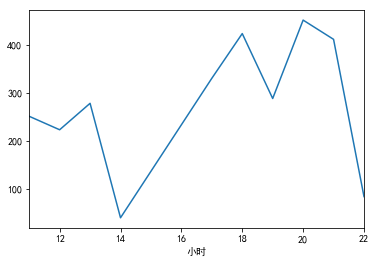

In [59]:
data.groupby("小时")["order_id"].count().plot()

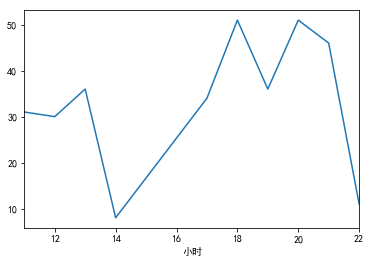

In [60]:
data.groupby("小时")["order_id"].nunique().plot()

# 哪一天人吃饭最多

In [61]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时
0,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11
1,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11
2,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11
3,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11
4,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11


In [66]:
data_03=data.copy()

data_03.index=data_03.place_order_time
data_03.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时
place_order_time,,,,,,,,,,,
2016-08-01 11:05:36,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11
2016-08-01 11:07:07,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11
2016-08-01 11:07:40,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11
2016-08-01 11:11:11,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11
2016-08-01 11:11:30,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11


In [64]:
data_03.resample('D')["counts"].sum()

place_order_time
2016-08-01    233
2016-08-02    151
2016-08-03    192
2016-08-04    169
2016-08-05    224
2016-08-06    793
2016-08-07    761
2016-08-08    171
2016-08-09    167
2016-08-10    227
Freq: D, Name: counts, dtype: int64

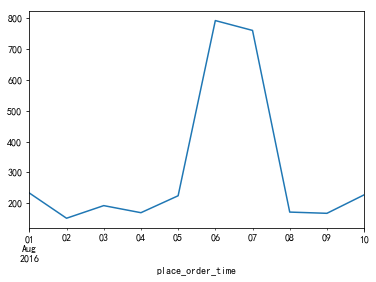

In [65]:
data_03.resample('D')["counts"].sum().plot()

# 星期几人吃饭最多

In [67]:
data_03.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时
place_order_time,,,,,,,,,,,
2016-08-01 11:05:36,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11
2016-08-01 11:07:07,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11
2016-08-01 11:07:40,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11
2016-08-01 11:11:11,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11
2016-08-01 11:11:30,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11


In [70]:
data_03["星期"]=data_03.place_order_time.dt.strftime("%w")
data_03.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时,星期
place_order_time,,,,,,,,,,,,
2016-08-01 11:05:36,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11,1
2016-08-01 11:07:07,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11,1
2016-08-01 11:07:40,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11,1
2016-08-01 11:11:11,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11,1
2016-08-01 11:11:30,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11,1


In [71]:
data_03.groupby("星期")["counts"].sum()

星期
0    761
1    404
2    318
3    419
4    169
5    224
6    793
Name: counts, dtype: int64

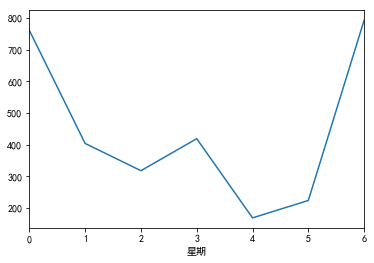

In [72]:
data_03.groupby("星期")["counts"].sum().plot()

# 每日菜品总价格， 均价， 中位数

## 每日菜品总价格

In [73]:
data_03.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时,星期
place_order_time,,,,,,,,,,,,
2016-08-01 11:05:36,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11,1
2016-08-01 11:07:07,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11,1
2016-08-01 11:07:40,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11,1
2016-08-01 11:11:11,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11,1
2016-08-01 11:11:30,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11,1


In [74]:
data_03["date"]=data_03.place_order_time.dt.date

In [75]:
data_03.head()

,detail_id,order_id,dishes_id,dishes_name,counts,amounts,place_order_time,picture_file,emp_id,菜品单价总额,小时,星期,date
place_order_time,,,,,,,,,,,,,
2016-08-01 11:05:36,2956,417,610062,蒜蓉生蚝,1,49,2016-08-01 11:05:36,caipu/104001.jpg,1442,49,11,1,2016-08-01
2016-08-01 11:07:07,2958,417,609957,蒙古烤羊腿,1,48,2016-08-01 11:07:07,caipu/202003.jpg,1442,48,11,1,2016-08-01
2016-08-01 11:07:40,2961,417,609950,大蒜苋菜,1,30,2016-08-01 11:07:40,caipu/303001.jpg,1442,30,11,1,2016-08-01
2016-08-01 11:11:11,2966,417,610038,芝麻烤紫菜,1,25,2016-08-01 11:11:11,caipu/105002.jpg,1442,25,11,1,2016-08-01
2016-08-01 11:11:30,2968,417,610003,蒜香包,1,13,2016-08-01 11:11:30,caipu/503002.jpg,1442,13,11,1,2016-08-01


In [76]:
data_03.groupby(["date","dishes_name"])['菜品单价总额'].sum()

date        dishes_name
2016-08-01  42度海之蓝          99
            50度古井贡酒         90
            53度茅台          128
            一品香酥藕           10
            五彩藕苗            70
                          ... 
2016-08-10  鲜美鳝鱼            55
            麻辣小龙虾          891
            黄尾袋鼠西拉子红葡萄酒     46
            黄花菜炒木耳          70
            黑米恋上葡萄          33
Name: 菜品单价总额, Length: 965, dtype: int64

## 每日菜品均价

In [77]:
data_03.groupby(["date","dishes_name"])['菜品单价总额'].mean()

date        dishes_name
2016-08-01  42度海之蓝          99.0
            50度古井贡酒         90.0
            53度茅台          128.0
            一品香酥藕           10.0
            五彩藕苗            35.0
                           ...  
2016-08-10  鲜美鳝鱼            55.0
            麻辣小龙虾           99.0
            黄尾袋鼠西拉子红葡萄酒     46.0
            黄花菜炒木耳          35.0
            黑米恋上葡萄          33.0
Name: 菜品单价总额, Length: 965, dtype: float64

## 每日菜品中位数

In [78]:
data_03.groupby(["date","dishes_name"])['菜品单价总额'].median()

date        dishes_name
2016-08-01  42度海之蓝          99.0
            50度古井贡酒         90.0
            53度茅台          128.0
            一品香酥藕           10.0
            五彩藕苗            35.0
                           ...  
2016-08-10  鲜美鳝鱼            55.0
            麻辣小龙虾           99.0
            黄尾袋鼠西拉子红葡萄酒     46.0
            黄花菜炒木耳          35.0
            黑米恋上葡萄          33.0
Name: 菜品单价总额, Length: 965, dtype: float64